### Time Series for CPC and IMERG Data

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import netCDF4

In [3]:
#Load .nc file for CPC and IMERG
path = '/Users/emmabenedict/Desktop/CURO 4970R/'
cpc_nc = xr.open_dataset(path + 'CPC.1958-1997.US.2x2.5.hourly.precip.nc')
#Load .nc file for IMERG
path = '/Users/emmabenedict/Desktop/CURO 4970R/'
imerg_nc = xr.open_dataset(path + 'IMERG.2001-2020.US.2x2.5.half_hourly.precipitationCal.nc')

In [7]:
#Load variables
#CPC
lat_cpc = cpc_nc.lat
lon_cpc = cpc_nc.lon
time_cpc = cpc_nc.time
precip_cpc = cpc_nc.precip
#MMF
lat_img = imerg_nc.lat
lon_img = imerg_nc.lon
time_img = imerg_nc.time
precip_img = imerg_nc.precipitationCal

In [14]:
cpc_nc

<xarray.Dataset>
Dimensions:  (lat: 21, lon: 33, time: 350640)
Coordinates:
  * lat      (lat) float32 20.0 22.0 24.0 26.0 28.0 ... 52.0 54.0 56.0 58.0 60.0
  * lon      (lon) float32 220.0 222.5 225.0 227.5 ... 292.5 295.0 297.5 300.0
  * time     (time) datetime64[ns] 1958-01-01 ... 1997-12-31T23:00:00
Data variables:
    precip   (time, lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    title:          CPC 2x2.5 Hourly US Precipitation
    Conventions:    CF-1.2
    history:        Tue Feb  9 04:56:06 2021: ncrcat 1958-1997/precip.hour.19...
    description:    Gridded hourly Precipitation
    platform:       Observations
    documentation:  https://www.esrl.noaa.gov/psd/data/gridded/data.cpc_hour....
    Source:         http://www.cpc.ncep.noaa.gov/products/precip/realtime/tmi...
    References:     https://www.psl.noaa.gov/data/gridded/data.cpc_hour.html
    dataset_title:  CPC Hourly Precipitation for the United States
    NCO:            netCDF Operators version 4.9.7 (Homepage = http://nco.sf....

In [15]:
#Pick out two locations: Athens, GA & Seattle, WA
cpc_athens = precip_cpc.sel(lon=276.64,lat=33.95,method="nearest")*25.4
cpc_seattle = precip_cpc.sel(lon=237.67,lat=47.60,method="nearest")*25.4
img_athens = precip_img.sel(lon=276.64,lat=33.95,method="nearest")#*1000*60*60*24
img_seattle = precip_img.sel(lon=237.67,lat=47.60,method="nearest")#*1000*60*60*24

In [18]:
avg = np.mean(cpc_athens)
avg1 = np.mean(cpc_seattle)
avg2 = np.mean(img_athens)
avg3 = np.mean(img_seattle)
print(avg)
print(avg1)
print(avg2)
print(avg3)

<xarray.DataArray 'precip' ()>
array(0.13232869, dtype=float32)
Coordinates:
    lat      float32 34.0
    lon      float32 277.5
<xarray.DataArray 'precip' ()>
array(0.12326864, dtype=float32)
Coordinates:
    lat      float32 48.0
    lon      float32 237.5
<xarray.DataArray 'precipitationCal' ()>
array(0.15312223, dtype=float32)
Coordinates:
    lat      float64 34.0
    lon      float64 277.5
<xarray.DataArray 'precipitationCal' ()>
array(0.18526144, dtype=float32)
Coordinates:
    lat      float64 48.0
    lon      float64 237.5


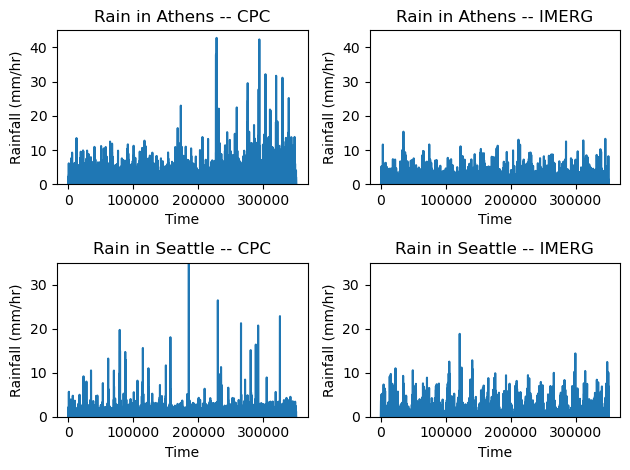

In [17]:
plt.figure()
plt.subplot(2,2,1)
plt.plot(cpc_athens)
plt.xlabel("Time")
plt.ylim(0,45)
plt.ylabel("Rainfall (mm/hr)")
plt.title("Rain in Athens -- CPC")

plt.subplot(2,2,2)
plt.plot(img_athens)
plt.xlabel("Time")
plt.ylabel("Rainfall (mm/hr)")
plt.ylim(0,45)
plt.title("Rain in Athens -- IMERG")

plt.subplot(2,2,3)
plt.plot(cpc_seattle)
plt.xlabel("Time")
plt.ylabel("Rainfall (mm/hr)")
plt.ylim(0,35)
plt.title("Rain in Seattle -- CPC")

plt.subplot(2,2,4)
plt.plot(img_seattle)
plt.xlabel("Time")
plt.ylabel("Rainfall (mm/hr)")
plt.ylim(0,35)
plt.title("Rain in Seattle -- IMERG")

plt.tight_layout()